<a href="https://colab.research.google.com/github/iGeology-Illinois/geol-581-module-3-principles-of-uncertainty-chapter-4-jgybels/blob/main/Copy_of_GEOL581_M3StatsHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 4.1

A rock slope is to be cut as part of a road construction project. However, there is a risk that the slope could slide along the bedding planes into the excavation pit. In order to carry out a stability analysis it is necessary to estimate the angle of friction along the bedding planes. An initial assessment on the mean value of the friction angle can be obtained from the spectrum of possible manifestations of the friction angle. It cannot be smaller than the base friction angle, i.e. the friction angle that would result on the sawn, smooth surface of a specimen. The base friction angle for the greywackes that make up the slope is about 20°. The maximum possible friction angle can be estimated by back-calculating past failure cases. So far, no friction angle exceeding 35° has been back-calculated. What is the probability that the friction angle is smaller than 25°? Since no further information is available, the PDF of the friction angle can be assumed to be uniform.

In [ ]:
# In this cell, you can begin by importing the libraries you need and setting up a simple
# calculation to handle the uniform distribution between 20 and 35 degrees.
import numpy as np
from scipy import stats

# HINT:
# 1. You can model friction angles as U(20, 35).
# 2. Calculate the probability that the friction angle is below 25 degrees.
# 3. Confirm your result matches the analytical approach: (25 - 20) / (35 - 20).

# Define limits:
lower_bound = 20
upper_bound = 35
desired_angle = 25
n = 1000

# Uniform distribution between 20 and 30 degrees
phi_deg = np.random.uniform(lower_bound, upper_bound, n)

# Caculate probability that friction angle is below 25 degrees
probability = np.mean(phi_deg < 25)

print("Probability that phi < 25° =", probability)

# Confirm results match analytical approach
probability = (desired_angle - lower_bound) / (upper_bound - lower_bound)

print("Probability that phi < 25° =", probability)






Probability that phi < 25° = 0.327
Probability that phi < 25° = 0.3333333333333333


# Question 4.2

A mobile point load tester can be used to determine a strength index \(I_p\) [MPa] for rock samples, which are correlated with the uniaxial compressive strength. 25 strength values \(I_p\) were determined for a sandstone sequence:

4.4; 4.2; 4.5; 4.0; 4.3; 4.1; 3.9; 4.2; 4.5; 3.8; 4.0; 4.3; 4.2; 4.2;
4.1; 4.5; 4.2; 4.3; 4.1; 3.7; 4.0; 4.5; 4.6; 4.3; 4.1
(n = 25)

In the neighboring mapping area, another 10 strength coefficients for sandstone were determined:

3.7; 4.5; 4.2; 4.4; 4.3; 4.0; 3.5; 3.9; 4.3; 4.3
(n = 10)

Do both samples come from the same population?

In [ ]:
# In this cell, import the necessary libraries for statistical testing.
# A typical approach is to use scipy.stats to perform a t-test or similar.
import numpy as np
from scipy import stats

# HINT:
# 1. Store each sample in a NumPy array.
# 2. Decide on an appropriate test (e.g., an unpaired two-sample t-test).
# 3. Check assumptions (normality, variance).
# 4. Use stats.ttest_ind(...) or a non-parametric alternative if needed.

# Define sample arrays:
sample1 = np.array([4.4, 4.2, 4.5, 4.0, 4.3, 4.1, 3.9, 4.2, 4.5, 3.8, 4.0, 4.3, 4.2, 4.2, 4.1, 4.5, 4.2, 4.3, 4.1, 3.7, 4.0, 4.5, 4.6, 4.3, 4.1])
sample2 = np.array([3.7, 4.5, 4.2, 4.4, 4.3, 4.0, 3.5, 3.9, 4.3, 4.3])

# Check if normally distrubuted using Shapiro Wilk Test
stat1, p1 = stats.shapiro(sample1)
stat2, p2 = stats.shapiro(sample2)

print("Sample 1 Normality p-value:", round(p1, 2))
print("Sample 2 Normality p-value:", round(p2, 2))

if p1 > 0.05:
    print("Sample 1 looks normally distributed")
else:
    print("Sample 1 is NOT normally distributed")

if p2 > 0.05:
    print("Sample 2 looks normally distributed")
else:
    print("Sample 2 is NOT normally distributed")


# Check if normally distrubuted using Levene's Test
stat, p = stats.levene(sample1, sample2)

print("Levene’s test p-value:", round(p, 2))

if p > 0.05:
    print("Variances are approximately equal")
else:
    print("Variances are significantly different")

# Complete Standard t-test (nomarlly distrubuted and equal variance)
t_stat, p_value = stats.ttest_ind(sample1, sample2)

alpha = 0.05

print("t-statistic:", round(t_stat, 2))
print("p-value:", round(p_value, 2))

if p_value < alpha:
    print("Result: Reject the null hypothesis.")
    print("Conclusion: The two sample means are significantly different.")
else:
    print("Result: Fail to reject the null hypothesis.")
    print("Conclusion: No statistically significant difference between the two sample means.")






Sample 1 Normality p-value: 0.57
Sample 2 Normality p-value: 0.3
Sample 1 looks normally distributed
Sample 2 looks normally distributed
Levene’s test p-value: 0.27
Variances are approximately equal
t-statistic: 0.93
p-value: 0.36
Result: Fail to reject the null hypothesis.
Conclusion: No statistically significant difference between the two sample means.


In [ ]:
# Question 4.3

A construction pit of 10,000 m³ is to be excavated. The subground consists of Pleistocene sediments of which it is known that erratic blocks (boulders) occur, having an average diameter of 1.5 m.
Experience shows that about 1% by volume of the excavated material in this region consists of boulders. Since special equipment is needed to extract them and delays in construction are to be expected,
the contractor is interested in the probability of having to extract more boulders than experience suggests. He would also like to know what the probability is that more than ten boulders will be found.


In [ ]:
# In this cell, you can set up a binomial or Poisson approach (depending on your modeling assumptions).
import numpy as np
from scipy import stats
from scipy.stats import poisson

# HINT:
# 1. Estimate the expected number of boulders as 1% of the total volume or total 'units' of excavation.
# 2. Use a binomial model with parameters n (number of trials) and p = 0.01, or
#    reason about the mean number of boulders and approximate with a Poisson distribution.
# 3. Compute probabilities for "more boulders than expected" and for "more than ten boulders."

# Assumptions
v = 10000  # volume m3
p = 0.01   # probability
d = 1.5    # avearage boulder diameter in m

# Average boulder volume
v_boulder = (np.pi / 6) * d**3

# Expected total boulder volume
v_boulders = v * p

# Expected number of boulders
lam = v_boulders / v_boulder

print("Expected number of boulders:", round (lam,2))

# Porbability of more than expected number of boulders
k_mean = int(np.ceil(lam))
prob = 1 - poisson.cdf(k_mean - 1, lam)
print("P(N ≥ expected)", round(prob, 2))

# Porbability of more than 10 bouldres
k_mean = int(np.ceil(lam))
prob = 1 - poisson.cdf(10, lam)
print("P(N > 10)", round(prob, 2))










Expected number of boulders: 56.59
P(N ≥ expected) 0.5
P(N > 10) 1.0


# Question 4.4

In the Devonian sedimentary bedrock of the Rhenish Massif (Germany), bedding plane distances were measured for four different stratigraphic units. The coefficients of (squared) skewness and kurtosis are given as:

\[
(\beta_1^2, \beta_2) = (1.82, 4.85);\quad (1.00, 3.35);\quad (2.72, 5.71);\quad (0.52, 2.95).
\]

What statistical distribution do the bedding plane distances follow?

In [7]:
# In this cell, consider how to analyze a dataset to infer its distribution based on skewness and kurtosis.
import numpy as np
from scipy import stats

# HINT:
# 1. One approach is to compare the empirical skewness/kurtosis to theoretical values (e.g., normal, lognormal, gamma).
# 2. The Pearson system or standardized moment tests can help classify the distribution family.
# 3. If you had actual data, you could apply stats.skew(...) and stats.kurtosis(...) and compare.

# Define data
b1_sq = np.array([1.82, 1.00, 2.72, 0.52])
b2    = np.array([4.85, 3.35, 5.71, 2.95])

# Compare skewness/kurtosis to theoretical values
for i in range(len(skew_obs)):

    skew = skew_obs[i]
    kurt = kurt_obs[i]

    if skew == 0:
        print(f"Unit {i+1}: Normal distribution")
        continue

    # Estimate gamma shape
    k_est = (2 / skew)**2

    kurt_gamma = 3 + 6/k_est

    print(f"\nUnit {i+1}")
    print(f"Observed kurtosis: {kurt:.2f}")
    print(f"Gamma kurtosis:    {kurt_gamma:.2f}")

    if abs(kurt - kurt_gamma) < 0.5:
        print("→ Likely Gamma distribution")
    elif abs(kurt - 3) < 0.3:
        print("→ Near Normal distribution")
    else:
        print("→ Possibly Lognormal or Pearson Type I")

    print('\n',"Data is most consistent with gamma or lognormal distribution")





Unit 1
Observed kurtosis: 4.85
Gamma kurtosis:    5.73
→ Possibly Lognormal or Pearson Type I

 Data is most consistent with gamma or lognormal distribution

Unit 2
Observed kurtosis: 3.35
Gamma kurtosis:    4.50
→ Possibly Lognormal or Pearson Type I

 Data is most consistent with gamma or lognormal distribution

Unit 3
Observed kurtosis: 5.71
Gamma kurtosis:    7.08
→ Possibly Lognormal or Pearson Type I

 Data is most consistent with gamma or lognormal distribution

Unit 4
Observed kurtosis: 2.95
Gamma kurtosis:    3.78
→ Near Normal distribution

 Data is most consistent with gamma or lognormal distribution


### Question 4.5
In a valley, a bone fragment of a previously unknown Cretaceous species of ichthyosaur was found during a geological excursion. To search for more fragments, you plan to investigate two upstream branches of the river. Branch 1 (larger) has a catchment area of 18 km², while Branch 2 (smaller) has a catchment area of 10 km². Additionally, in 35% of Branch 1’s area marine Cretaceous rocks are exposed, whereas in Branch 2 that figure is 80%. Given these data, estimate the probability that the fossil came from the larger catchment area. Explain any assumptions you make about probabilities and how you handle the likelihood of the fossil being transported from each branch.


In [12]:
# Hints and Starting Code for Question 4.5

# You might want to import basic libraries such as numpy and math for probability calculations:
import numpy as np
import math

# Approach Hints:
# 1. Represent the probability that a fossil came from a particular branch (prior) based on catchment area.
# 2. Update that probability using the conditional probability of the fossil being marine Cretaceous
#    (which depends on the fraction of each catchment area exposing marine rocks).
# 3. Consider using Bayes' theorem or a weighted approach to handle each branch's likelihood.

# Define variables:
A1, A2 = 18, 10
m1, m2 = 0.35, 0.8

# Assuming equal transport efficiency, T1 = T2

# Probability that a fossible came from catchment area
P_B1 = A1 / (A1 + A2)
P_B2 = A2 / (A1 + A2)

# Considering Bayes' theorem
num = m1 * P_B1
den = num + m2 * P_B2
PB1_givenM = num / den

print("P(B1) =", P_B1)
print("P(B2) =", P_B2)
print("P(B1|M) =", round(PB1_givenM, 3))

print('\n',"44% chance fossil came from larger catchment")




P(B1) = 0.6428571428571429
P(B2) = 0.35714285714285715
P(B1|M) = 0.441

 44% chance fossil came from larger catchment


### Question 4.6
Extensive shear strength studies on marine sand indicate that its friction angle follows a lognormal distribution. The measured mean value and standard deviation of the log-transformed friction angle are reported as μ<sub>lnφ</sub> = 3.25 and σ<sub>lnφ</sub> = 0.65. Use these parameters to discuss the distribution of friction angles and to compute key statistics (e.g., the mean friction angle in degrees and its confidence intervals) assuming a lognormal model.


In [38]:
# Hints and Starting Code for Question 4.6

import numpy as np
import math
from scipy.stats import lognorm

# Approach Hints:
# 1. Recall that if X is lognormally distributed, then ln(X) ~ N(mean, std).
# 2. Here, mean = 3.25, std = 0.65 refer to the normal distribution of ln(φ).
# 3. Use scipy.stats.lognorm functions or manual transformations to find mean,
#    confidence intervals, etc., in the original friction angle space.

# Define Parameters
mu_ln = 3.25
sigma_ln = 0.65

shape = sigma_ln
scale = np.exp(mu_ln)

# Mean, median, variance, and standard deviation
mean = lognorm.mean(shape, scale=scale)
median = lognorm.median(shape, scale=scale)
std_phi = lognorm.std(shape, scale=scale)

# Confidence Interval

ci_95 = lognorm.interval(0.95, shape, scale=scale)
phi_5 = lognorm.ppf(0.05, shape, scale=scale)

print("Mean:", round(mean,2))
print("Median:", round(median, 2))
print("Std Dev:", round(std_phi, 2))
print("95% CI:", (ci_95))
print("5th percentile:", (phi_5))



Mean: 31.86
Median: 25.79
Std Dev: 23.1
95% CI: (np.float64(7.213998756072901), np.float64(92.20151756810759))
5th percentile: 8.853785808142145


### Question 4.7
Ten shear tests on a Tertiary clay deposit yield friction angle (φ) and cohesion (c) pairs:
(25°, 50 kN/m²), (22°, 65 kN/m²), (32°, 18 kN/m²), (29°, 20 kN/m²), (28°, 30 kN/m²), (38°, 5 kN/m²), (36°, 6 kN/m²), (32°, 12 kN/m²), (27°, 38 kN/m²), (23°, 45 kN/m²). Investigate whether there is a correlation between friction angle and cohesion. Summarize your findings on the relationship (e.g., positive, negative, or none).


Pearson p-value: 3.741e-05


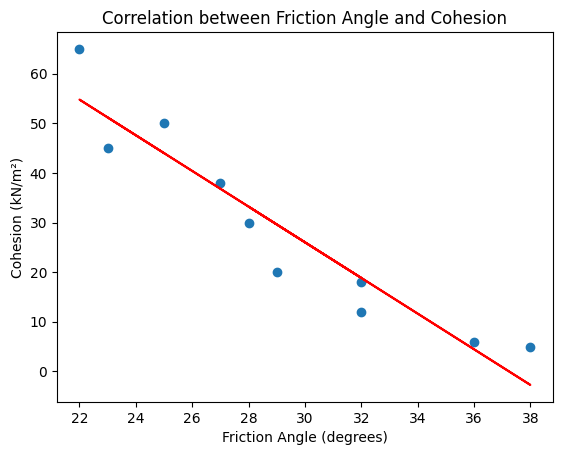

There is a negative coerlation between friction angle and cohesion


In [50]:
# Hints and Starting Code for Question 4.7

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Approach Hints:
# 1. Store the friction angle and cohesion data in numpy arrays or a pandas DataFrame.
# 2. Plot φ vs. c to visualize potential correlation.
# 3. Calculate Pearson's correlation coefficient using pearsonr or a similar function.
# 4. Interpret whether the correlation is statistically significant and positive/negative.

# Define Data

phi = np.array([25, 22, 32, 29, 28, 38, 36, 32, 27, 23])    #degrees
c = np.array([50, 65, 18, 20, 30, 5, 6, 12, 38, 45])  #kN/m2

# Pearson Correlation
correlation_coefficient, p_value = pearsonr(phi, c)

print("Pearson p-value:", round(p_value, 8))

#Linear Regression
coeffs = np.polyfit(phi, c, 1)
reg_line = np.poly1d(coeffs)

# Plot
plt.scatter(phi, c)
plt.plot(phi, reg_line(phi), color='red')
plt.xlabel("Friction Angle (degrees)")
plt.ylabel("Cohesion (kN/m²)")
plt.title("Correlation between Friction Angle and Cohesion")
plt.show()

print("There is a negative coerlation between friction angle and cohesion")



In [ ]:
### Question 4.8
Monthly landslide frequency in a mountain region is documented in a histogram (Fig. 4.53). The question is whether there is a cyclic pattern or seasonal trend in landslide occurrence.
Outline a method to determine if the observed frequencies are random or exhibit significant seasonality.


/tmp/ipython-input-323/1743068497.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2022-01-01", periods=len(freq), freq='M')


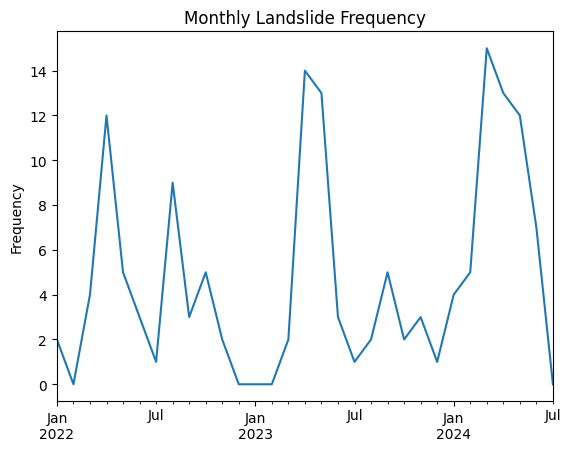

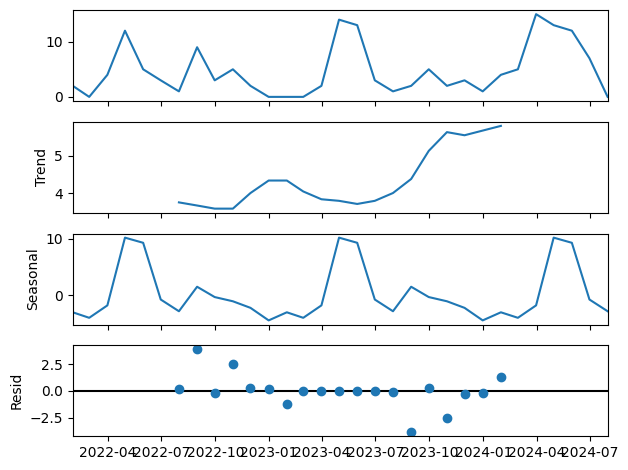

Seasonal frequency observed and long term increase in number of event


In [59]:
# Hints and Starting Code for Question 4.8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Define Data
freq = np.array([2,0,4,12,5,3,1,9,3,5,2,0,0,0,2,14,13,3,1,2,5,2,3,1,4,5,15,13,12,7,0])    ## per month

#time series analysis
dates = pd.date_range(start="2022-01-01", periods=len(freq), freq='M')
ts = pd.Series(freq, index=dates)

ts.plot(title="Monthly Landslide Frequency")
plt.ylabel("Frequency")
plt.show()

result = seasonal_decompose(ts, model='additive', period=12)
result.plot()
plt.show()

print("Seasonal frequency observed and long term increase in number of event")

# Approach Hints:
# 1. Represent the monthly frequency data in a time series format.
# 2. Use time-series analysis, e.g., seasonal_decompose from statsmodels, to detect seasonality.
# 3. Alternatively, consider hypothesis tests for randomness or periodicity (e.g. autocorrelation plots).
# 4. Visualize the data to check for any repeating patterns across months or seasons.


### Question 4.9
Two boreholes have been drilled on opposite sides of a fault. The objective is to reconstruct the vertical displacement across the fault. Direct markers are lacking, but variations in mean chlorite content (Fig. 4.54) may provide an indirect measure of displacement. Propose a strategy to use cross-correlation of chlorite content profiles to estimate the fault offset. Discuss any assumptions about continuity and variability of the chlorite data in the subsurface.


In [61]:
# Hints and Starting Code for Question 4.9

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Approach Hints:
# 1. Represent each borehole's chlorite content profile as a 1D series of numeric values at depth intervals.
# 2. Use the scipy.signal.correlate function to compute cross-correlation between the two profiles.
# 3. Identify the lag (depth shift) that maximizes correlation as an estimate of displacement.
# 4. Carefully consider sampling intervals, data resolution, and boundary effects.

# Import Data
borehole1 = np.array([0.5, 1.7, 0.5, 0.6, 2.0, 1.0, 0.5, 1.0, 0.5, 2.1, 0.5, 0.4, 1.6]) # 2.5 m depth intervals
borehole2 = np.array([0.8, 2.0, 1.0, 1.5, 0.8, 0.8, 0.8, 2.5, 0.8, 1.0, 1.3, 0.7, 0.9]) # 2.5 m depth intervals
depth_interval = 2.5

x = (borehole1 - np.mean(borehole1)) / np.std(borehole1)
y = (borehole2 - np.mean(borehole2)) / np.std(borehole2)

# Cross Correlation
corr = correlate(y, x, mode='full')
print(corr)

# Identify lag that maximizes correlation
lags = np.arange(-len(x)+1, len(y))
best_index = np.argmax(corr)
best_lag = lags[best_index]
best_shift_m = best_lag * depth_interval

print("Best lag (samples):", best_lag)
print("Estimated vertical displacement (m):", best_shift_m)



[-0.65473402  2.25316905 -1.32015005 -1.56307387  2.39111441 -2.37932736
  2.50861661  0.67351963 -4.1160761   0.17091228  5.84895722 -4.44022009
  1.81962647 -3.03479807  0.03333526  3.94903144 -2.31320935 -1.66086958
  5.07045913 -4.20613656 -0.2545267   1.54705084 -0.84130098  0.14144465
  0.37718573]
Best lag (samples): -2
Estimated vertical displacement (m): -5.0


### Question 4.10
A medieval copper mine site is being converted into residential housing, and evidence of ancient copper contamination is expected. Sea thrift (Armeria maritima) is an indicator plant for copper, so its presence was recorded along a profile in 20 m × 20 m squares. The observed shoot counts are:  
3, 5, 11, 12, 8, 19, 22, 18, 11, 13  

An experimental semivariogram is to be derived from these data as a preliminary spatial analysis. Outline how you would compute and plot a semivariogram for these shoot counts, and discuss what patterns in spatial variability might imply for copper contamination distribution.


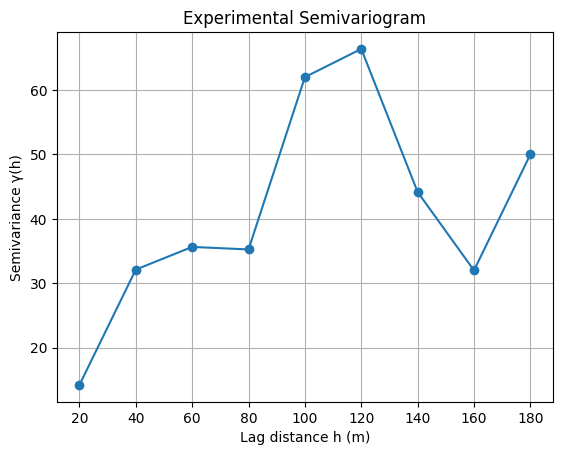

In [20]:
# Hints and Starting Code for Question 4.10

import numpy as np
import matplotlib.pyplot as plt

# Approach Hints:
# 1. Arrange the shoot counts in spatial order (e.g., as a function of distance along the profile).
# 2. Calculate pairwise distances between measurement points (assuming each square is at intervals of 20 m).
# 3. Compute the semivariogram γ(h) = 0.5 * mean[ (Z(x) - Z(x+h))^2 ] for each distance bin h.
# 4. Plot the semivariogram (γ on the y-axis vs. distance h on the x-axis) to see if there's any spatial structure.
# 5. Look for a sill, range, or nugget effect that might indicate how contamination (and thus sea thrift) is distributed.

# Import data & calculate pairwise distance assuming 20 m interval
shoots = np.array([3, 5, 11, 12, 8, 19, 22, 18, 11, 13], dtype=float)
dx = 20
x = np.arange(len(shoots)) * dx

# Compute semivariogram
lags = np.arange(1, len(shoots))
h = lags * dx

gamma = []
N = []

for k in lags:
    diffs = shoots[k:] - shoots[:-k]
    gamma.append(0.5 * np.mean(diffs**2))
    N.append(len(diffs))

gamma = np.array(gamma)
N = np.array(N)

# Plot semivariogram

plt.figure()
plt.plot(h, gamma, marker='o')
plt.xlabel("Lag distance h (m)")
plt.ylabel("Semivariance γ(h)")
plt.title("Experimental Semivariogram")
plt.grid(True)
plt.show()



# Question 4.11

The following rock sequences are encountered in exploratory drilling:

- Claystone (C)  
- Conglomerate (K)  
- Sandstone (S)  
- Siltstone (U)

(See Table 4.5 for the per-meter breakdown.)

**Task:**  
1. What is the probability that conglomerate (K) will be drilled again in the *next* meter of drilling?  
2. What is the probability that conglomerate will be drilled again in the *next-but-one* meter of drilling?

You may assume that the encountered rock types can be treated as sequential observations of a Markov process or using simpler independence assumptions (depending on your interpretation of the problem’s statement).

In [32]:
# Use this cell to start setting up your approach in Python.
# Possible steps:
# 1. Represent the rock sequences as a list or array.
# 2. Construct transition probabilities from the data if needed.
# 3. Calculate probabilities for "next meter" and "next-but-one meter."

import numpy as np

# HINT:
# - If you treat each meter drilled as a step in a Markov chain, you need a 4x4 transition matrix
#   (C, K, S, U) or some simpler approach based on frequencies.
# - Probability that K appears next might come directly from the row in the matrix corresponding
#   to the current rock type.
# - For the 'next-but-one' question, you might multiply transition matrices (e.g., T^2).

# Import Data
seq = np.array(['U','S','K','S','S','K','K','C','U','S',
    'K','S','S','K','C','U','S','S','S','K',
    'K','K','U'])

states = np.array(['C','K','S','U'])
idx = {s:i for i,s in enumerate(states)}

N = np.zeros((4,4), dtype=int)
for a, b in zip(seq[:-1], seq[1:]):
    N[idx[a], idx[b]] += 1

# Construct Probabilities
row_sums = N.sum(axis=1, keepdims=True)
T = np.divide(N, row_sums, out=np.zeros_like(N, dtype=float), where=row_sums!=0)

print("States order:", states)
print("Transition counts N:\n", N)
print("Transition matrix T:\n", np.round(T, 3))

# Calculate probabilities
# Next meter
k = idx['K']
current = 'K'   # change to 'C','S','U' if needed
p_next_K = T[idx[current], k]
print("P(K next | current =", current, ") =", round(p_next_K,3))

# Next-but-one meter
T2 = T @ T
p_two_ahead_K = T2[idx[current], k]
print("P(K in 2m | current =", current, ") =", round(p_two_ahead_K,3))

print('\n',"37.5% next meter and 28% next but one meter")




States order: ['C' 'K' 'S' 'U']
Transition counts N:
 [[0 0 0 2]
 [2 3 2 1]
 [0 5 4 0]
 [0 0 3 0]]
Transition matrix T:
 [[0.    0.    0.    1.   ]
 [0.25  0.375 0.25  0.125]
 [0.    0.556 0.444 0.   ]
 [0.    0.    1.    0.   ]]
P(K next | current = K ) = 0.375
P(K in 2m | current = K ) = 0.28

 37.5% next meter and 28% next but one meter


# Question 4.12

The following orientation data (dip direction α / dip β) for bedding planes are recorded (n=14):

123/25, 147/22, 120/24, 111/24, 142/26, 133/27, 135/22, 156/21,  
110/25, 101/25, 133/20, 123/22, 145/25, 126/24

**Task:**  
1. Determine the mean resultant length.  
2. Determine the dip direction and dip of the mean vector.  
3. Determine the spherical standard deviation and the spherical confidence interval of the mean vector for an error probability of α = 0.1.

In [56]:
# Use this cell to load and process the orientation data.
# HINT:
# 1. Convert the dip direction/dip pairs into unit vectors in 3D space.
# 2. Sum these vectors, and derive the resultant direction and magnitude.
# 3. Calculate relevant statistics (standard deviation, confidence intervals) on a sphere.

import numpy as np

# Example structure:
# data = [(123,25), (147,22), (120,24), ...]
# Then convert each (alpha, beta) to x,y,z components on the unit sphere.
# Summation and geometry yield the mean vector direction and length.

# Define Data

data = np.array([
    [123,25],[147,22],[120,24],[111,24],[142,26],[133,27],[135,22],
    [156,21],[110,25],[101,25],[133,20],[123,22],[145,25],[126,24]
])

n = 14

# Convert to radians
alpha = np.deg2rad(data[:,0])
beta  = np.deg2rad(data[:,1])

# Convert to vectors
x = np.cos(beta) * np.sin(alpha)
y = np.cos(beta) * np.cos(alpha)
z = np.sin(beta)

# Sum Vectors
X = np.sum(x)
Y = np.sum(y)
Z = np.sum(z)

# Resultant

R = np.sqrt(X**2 + Y**2 + Z**2)
R_bar = R / n

print("Mean resultant length R =", round(R, 3))
print("Mean resultant length per observation R_bar =", round(R_bar, 3))

# Direction

alpha_mean = np.rad2deg(np.arctan2(X, Y))
beta_mean  = np.rad2deg(np.arcsin(Z / R))

print("Mean dip direction =", round(alpha_mean, 2))
print("Mean dip =", round(beta_mean, 2))

# Relavent Statistics
s_rad = np.sqrt(-2*np.log(R_bar))
s_deg = np.rad2deg(s_rad)

print(f"Standard deviation in degrees: {round(s_deg, 2):.2f} degrees")



Mean resultant length R = 13.592
Mean resultant length per observation R_bar = 0.971
Mean dip direction = 129.01
Mean dip = 24.46
Standard deviation in degrees: 13.93 degrees
